<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/SL-Apparel-Dataset/blob/main/LightGBMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [6]:
from google.colab import drive
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
!pip install scikit-learn==1.4.1.post1
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import timedelta
import numpy as np
!pip install catboost

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
# Mounting the Google Drive
drive.mount('/content/drive')

training_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/training_dataset.xlsx')
retraining_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/retraining_dataset.xlsx')
sept_testing_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/sept_train_test.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
no_mat_training = training_df[training_df['Encoded Department'] != 1]
no_mat_retraining = retraining_df[retraining_df['Encoded Department'] != 1]
no_mat_testing = sept_testing_df[sept_testing_df['Encoded Department'] != 1]

In [10]:
features  = ['Encoded Code', 'Encoded Department', 'YearsWorked', 'DayOfWeek',
             'LeaveMonth', 'LeaveYear', 'Encoded Reason','Encoded Status',
             'Encoded Absenteeism Type', 'Encoded Shift', 'MonthlyDeptTotal']

In [11]:
retraining_df.shape

(85090, 24)

In [12]:
no_mat_training.shape

(72754, 24)

In [13]:
training_df.shape

(83236, 24)

In [14]:
no_mat_retraining.shape

(74259, 24)

In [15]:
no_mat_testing.shape

(1884, 13)

In [16]:
training_df.head()

,Unnamed: 0,Date,Shift,Code,Department,Absenteeism Type,Status,Leave Type,Reason,Joined Date,Encoded Code,YearsWorked,DayOfWeek,LeaveMonth,LeaveYear,MainDepartment,Encoded Department,Encoded Reason,Encoded Status,Encoded Absenteeism Type,Encoded Shift,MonthlyDeptTotal,LeavesNextMonth,TargetCategory
0,0,2021-12-01,Shift A,AA369,Team - MAT 4A - BD,Informed,Notified,1.0,Maternity,2015-09-11,369,6,3,12,2021,MAT,1,10,1,0,1,127,0,A
1,1,2021-12-01,Shift A,AA362,Team - MAT 4A - BD,Informed,Notified,1.0,Maternity,2018-11-14,362,3,3,12,2021,MAT,1,10,1,0,1,127,24,B
2,2,2021-12-01,Shift A,AA359,Team - MAT 4A - BD,Informed,Notified,1.0,Maternity,2019-10-09,359,2,3,12,2021,MAT,1,10,1,0,1,127,16,B
3,3,2021-12-01,Shift A,AA541,Team - MAT 4A - BD,Informed,Notified,1.0,Maternity,2020-10-02,541,1,3,12,2021,MAT,1,10,1,0,1,127,2,A
4,4,2021-12-01,Shift A,AA398,Team - MAT 3A - BD,Informed,Notified,1.0,Maternity,2008-02-29,398,13,3,12,2021,MAT,1,10,1,0,1,127,1,A


In [17]:
X_train = training_df[features]
Y_train = training_df['TargetCategory']

In [13]:
X_no_mat_train = no_mat_training[features]
Y_no_mat_train = no_mat_training['TargetCategory']

In [18]:
X_retrain = retraining_df[features]
Y_retrain = retraining_df['TargetCategory']

In [15]:
X_retrain_no_mat = no_mat_retraining[features]
Y_retrain_no_mat = no_mat_retraining['TargetCategory']

In [19]:
X_test = sept_testing_df[features]
Y_test = sept_testing_df['TargetCategory']

In [17]:
no_mat_X_test = no_mat_testing[features]
no_mat_Y_test = no_mat_testing['TargetCategory']

##Imbalanced Learning

In [18]:
Y_no_mat_train_counts = no_mat_training['TargetCategory'].value_counts()
print(Y_no_mat_train_counts)


A    42611
B    30143
Name: TargetCategory, dtype: int64


In [19]:
Y_train_counts = training_df['TargetCategory'].value_counts()
print(Y_train_counts)

A    45642
B    37594
Name: TargetCategory, dtype: int64


In [20]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.4.1.post1


Found existing installation: scikit-learn 1.4.1.post1
Uninstalling scikit-learn-1.4.1.post1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.4.1.post1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.4.1.post1
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)


In [ ]:
!pip uninstall imbalanced-learn
!pip install imbalanced-learn


Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/imbalanced_learn-0.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/imblearn/*
Proceed (Y/n)? y
  Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 3.3 MB/s eta 0:00:00


In [21]:
from imblearn.combine import SMOTEENN

# Define the SMOTEENN sampling strategy
smoteenn = SMOTEENN(random_state=42)

# Apply SMOTEENN to the training data
x_train_resampled, y_train_resampled = smoteenn.fit_resample(X_no_mat_train, Y_no_mat_train)


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py)

In [ ]:
class_counts = y_train_resampled.value_counts()

print("Class counts in y_train:")
print(class_counts)

#Model Training

In [1]:
!pip show lightgbm

Name: lightgbm
Version: 4.1.0
Summary: LightGBM Python Package
Home-page: https://github.com/microsoft/LightGBM
Author: 
Author-email: 
License: The MIT License (MIT)
        
        Copyright (c) Microsoft Corporation
        
        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, subject to the following conditions:
        
        The above copyright notice and this permission notice shall be included in all
        copies or substantial portions of the Software.
        
        THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
        IMPLIED, INCLUDING BUT NOT LIMITED TO 

In [20]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Define and train the LightGBM model with proper parameters
model_LGBM = LGBMClassifier(num_leaves=39, learning_rate=0.05, max_depth=6,  metric='logloss')
model_LGBM.fit(X_train, Y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37594, number of negative: 45642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 83236, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.451656 -> initscore=-0.193984
[LightGBM] [Info] Start training from score -0.193984


LGBMClassifier(learning_rate=0.05, max_depth=6, metric='logloss', num_leaves=39)

In [ ]:
import pickle
# Save the model
with open('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Models/LightGBM_model_original.pkl', 'wb') as file:
    pickle.dump(model_LGBM, file)

In [21]:
model_LGBM.fit(X_retrain, Y_retrain)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 38167, number of negative: 46923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 85090, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448549 -> initscore=-0.206537
[LightGBM] [Info] Start training from score -0.206537


LGBMClassifier(learning_rate=0.05, max_depth=6, metric='logloss', num_leaves=39)

#Training Accuracy

In [24]:
test_pred = model_LGBM.predict(X_retrain)


from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(Y_retrain, test_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           A       0.78      0.82      0.80     46923
           B       0.76      0.71      0.74     38167

    accuracy                           0.77     85090
   macro avg       0.77      0.77      0.77     85090
weighted avg       0.77      0.77      0.77     85090



#Testing dataset

In [ ]:
predictions_LGBM = model_LGBM.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

results_df = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions_LGBM})
accuracy = accuracy_score(Y_test, predictions_LGBM)
accuracy = "{:.3f}".format(accuracy)


print("Actual values and predictions:")
print(results_df)
print("\n\nAccuracy of Predicted Classes:", accuracy)

Actual values and predictions:
     Actual Predicted
0         A         A
1         B         B
2         B         B
3         B         B
4         B         B
...     ...       ...
2312      B         A
2313      A         A
2314      A         A
2315      A         A
2316      B         A

[2317 rows x 2 columns]


Accuracy of Predicted Classes: 0.802


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(Y_test, predictions_LGBM)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           A       0.78      0.95      0.86      1439
           B       0.87      0.56      0.68       878

    accuracy                           0.80      2317
   macro avg       0.82      0.76      0.77      2317
weighted avg       0.81      0.80      0.79      2317



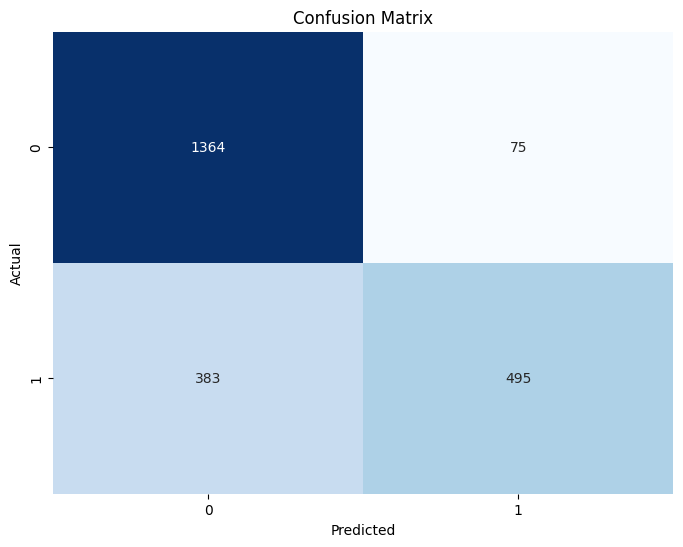

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(Y_test, predictions_LGBM)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Define and train the LightGBM model with proper parameters
model_LGBM_no_mat = LGBMClassifier(num_leaves=39, learning_rate=0.05, max_depth=6,  metric='logloss')
model_LGBM_no_mat.fit(x_train_resampled, y_train_resampled)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39605, number of negative: 36683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 399
[LightGBM] [Info] Number of data points in the train set: 76288, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.519151 -> initscore=0.076642
[LightGBM] [Info] Start training from score 0.076642
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=0.05, max_depth=6, metric='logloss', num_leaves=39)

In [ ]:
model_LGBM_no_mat.fit(X_retrain_no_mat, Y_retrain_no_mat)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 30478, number of negative: 43781
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 74259, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410428 -> initscore=-0.362195
[LightGBM] [Info] Start training from score -0.362195
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier(learning_rate=0.05, max_depth=6, metric='logloss', num_leaves=39)

In [ ]:
predictions_LGBM_no_mat = model_LGBM_no_mat.predict(no_mat_X_test)

In [ ]:
from sklearn.metrics import accuracy_score

results_df = pd.DataFrame({'Actual': no_mat_Y_test, 'Predicted': predictions_LGBM_no_mat})
accuracy = accuracy_score(no_mat_Y_test, predictions_LGBM_no_mat)
accuracy = "{:.3f}".format(accuracy)


print("Actual values and predictions:")
print(results_df)
print("\n\nAccuracy of Predicted Classes:", accuracy)

Actual values and predictions:
     Actual Predicted
0         A         A
4         B         B
5         A         A
6         A         A
7         A         A
...     ...       ...
2312      B         A
2313      A         A
2314      A         A
2315      A         A
2316      B         A

[1884 rows x 2 columns]


Accuracy of Predicted Classes: 0.779


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(no_mat_Y_test, predictions_LGBM_no_mat)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           A       0.80      0.94      0.86      1386
           B       0.67      0.33      0.44       498

    accuracy                           0.78      1884
   macro avg       0.73      0.64      0.65      1884
weighted avg       0.76      0.78      0.75      1884

